In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

stroke_top_df = pd.read_csv('stroke/csv/stroke_top.csv')
stroke_no_top_df = pd.read_csv('stroke/csv/stroke_no_top.csv')
diabetes_top_df = pd.read_csv('diabetes/csv/diabetes_top.csv')
diabetes_no_top_df = pd.read_csv('diabetes/csv/diabetes_no_top.csv')
dp_no_top_df = pd.read_csv('diabetes/csv/dp_no_top.csv')
dp_top_df = pd.read_csv('diabetes/csv/dp_top.csv')
scalability_df = pd.read_csv('stroke/csv/scalability_results.csv')

# Rename FedXGBLLR to FedXGBllr (values of the System column)
stroke_no_top_df['System'] = stroke_no_top_df['System'].replace('FedXGBLLR', 'FedXGBllr')
stroke_top_df['System'] = stroke_top_df['System'].replace('FedXGBLLR', 'FedXGBllr')
diabetes_no_top_df['System'] = diabetes_no_top_df['System'].replace('FedXGBLLR', 'FedXGBllr')
diabetes_top_df['System'] = diabetes_top_df['System'].replace('FedXGBLLR', 'FedXGBllr')

# Change font to Dejavu Sans Condensed
plt.rcParams['pdf.fonttype'] = 42

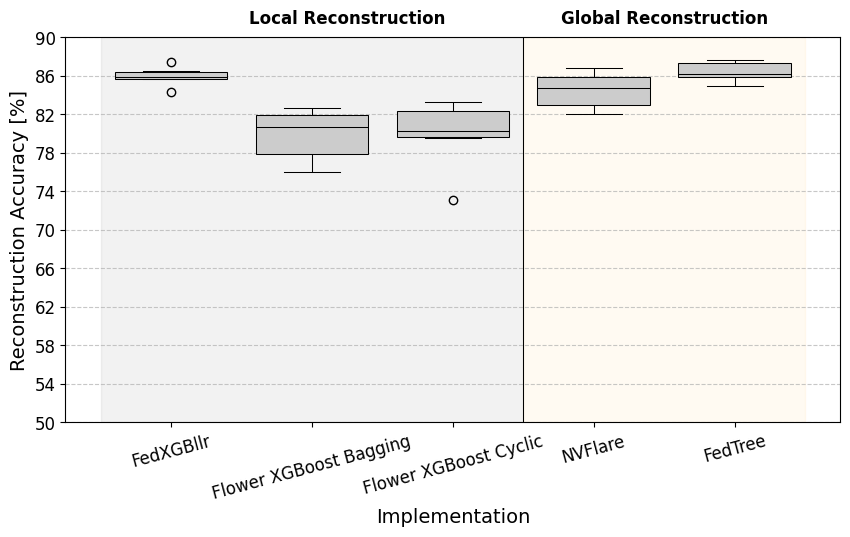

In [ ]:
# Box plot with stroke_top_df with x axist System and y axis Accuracy. use different colors for different implementations
plt.figure(figsize=(10, 5))
sns.boxplot(x='System', y='Accuracy', data=stroke_no_top_df, color=".8", linecolor="black", linewidth=.75, order=[ 'FedXGBllr', 'Flower XGBoost Bagging', 'Flower XGBoost Cyclic', 'NVFlare', 'FedTree'])
plt.xlabel(('Implementation'), fontsize=14)
plt.ylabel(('Reconstruction Accuracy [%]'), fontsize=14)


# Add shaded areas for zones
plt.axvspan(-0.5, 2.5, color='gray', alpha=0.1)  # Local Reconstruction
plt.axvspan(2.5, 4.5, color='orange', alpha=0.05)  # Global Reconstruction

# Add text labels for zones
plt.text(1.25, 91, 'Local Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(3.5, 91, 'Global Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a bold vertical separator line between local and global
plt.axvline(x=2.5, color='black', linestyle='-', linewidth=.75)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12, ticks=[i for i in range(50, 94, 4)])
# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("stroke/pdf/stroke_all_boxplot.pdf", format="pdf", bbox_inches="tight")
plt.show()


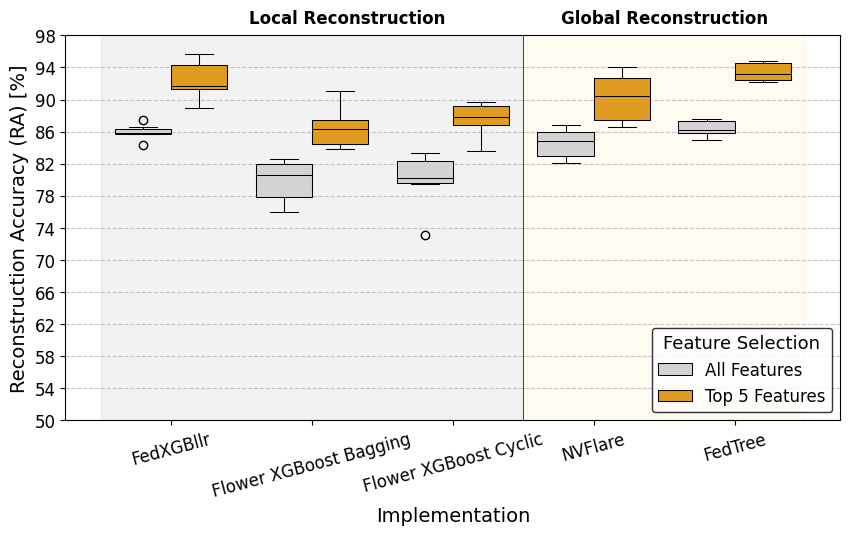

In [ ]:
# Combine both datasets with a new column to indicate feature selection type
stroke_no_top_df["Feature Selection"] = "All Features"
stroke_top_df["Feature Selection"] = "Top 5 Features"

# Merge the two datasets
combined_df = pd.concat([stroke_no_top_df, stroke_top_df])

# Create the grouped box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x="System", y="Accuracy", hue="Feature Selection", data=combined_df, linecolor="black",
            palette={"All Features": "lightgray", "Top 5 Features": "orange"},
            linewidth=.75,  order=[ 'FedXGBllr', 'Flower XGBoost Bagging', 'Flower XGBoost Cyclic', 'NVFlare', 'FedTree'])

# Labels and title
plt.xlabel("Implementation", fontsize=14)
plt.ylabel("Reconstruction Accuracy (RA) [%]", fontsize=14)

# Add shaded areas for zones
plt.axvspan(-0.5, 2.5, color='gray', alpha=0.1)  # Local Reconstruction
plt.axvspan(2.5, 4.5, color='orange', alpha=0.05)  # Global Reconstruction

# Add text labels for zones
plt.text(1.25, 99, 'Local Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(3.5, 99, 'Global Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a bold vertical separator line between local and global
plt.axvline(x=2.5, color='black', linestyle='-', linewidth=.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12, ticks=[i for i in range(50, 100, 4)])

# Customize legend
plt.legend(title="Feature Selection", title_fontsize=13, fontsize=12, loc="lower right", frameon=True, edgecolor="black")

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("stroke/pdf/stroke_top_boxplot.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

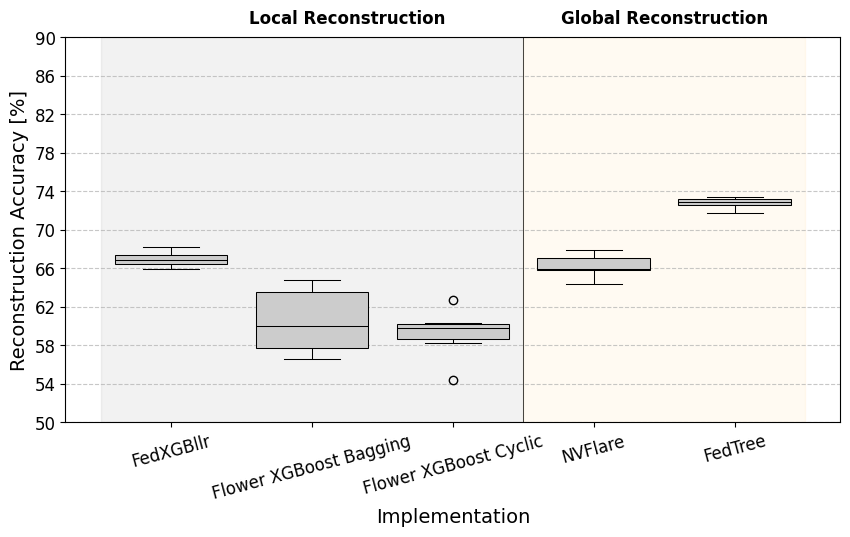

In [ ]:
# Box plot with stroke_top_df with x axist System and y axis Accuracy. use different colors for different implementations
plt.figure(figsize=(10, 5))
sns.boxplot(x='System', y='Accuracy', data=diabetes_no_top_df, color=".8", linecolor="black", linewidth=.75, order=[ 'FedXGBllr', 'Flower XGBoost Bagging', 'Flower XGBoost Cyclic', 'NVFlare', 'FedTree'])
plt.xlabel(('Implementation'), fontsize=14)
plt.ylabel(('Reconstruction Accuracy [%]'), fontsize=14)

# Add shaded areas for zones
plt.axvspan(-0.5, 2.5, color='gray', alpha=0.1)  # Local Reconstruction
plt.axvspan(2.5, 4.5, color='orange', alpha=0.05)  # Global Reconstruction

# Add text labels for zones
plt.text(1.25, 91, 'Local Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(3.5, 91, 'Global Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a bold vertical separator line between local and global
plt.axvline(x=2.5, color='black', linestyle='-', linewidth=.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12, ticks=[i for i in range(50, 94, 4)])
# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("diabetes/pdf/diabetes_all_boxplot.pdf", format="pdf", bbox_inches="tight")
plt.show()

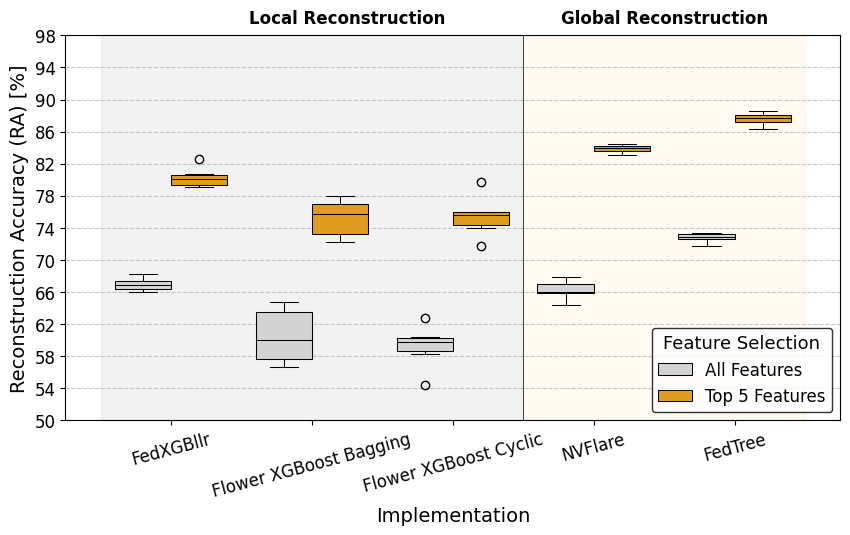

In [ ]:
# Combine both datasets with a new column to indicate feature selection type
diabetes_no_top_df["Feature Selection"] = "All Features"
diabetes_top_df["Feature Selection"] = "Top 5 Features"

# Merge the two datasets
combined_df = pd.concat([diabetes_no_top_df, diabetes_top_df])

# Create the grouped box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x="System", y="Accuracy", hue="Feature Selection", data=combined_df, linecolor="black",
            palette={"All Features": "lightgray", "Top 5 Features": "orange"},
            linewidth=.75,  order=[ 'FedXGBllr', 'Flower XGBoost Bagging', 'Flower XGBoost Cyclic', 'NVFlare', 'FedTree'])

# Labels and title
plt.xlabel("Implementation", fontsize=14)
plt.ylabel("Reconstruction Accuracy (RA) [%]", fontsize=14)

# Add shaded areas for zones
plt.axvspan(-0.5, 2.5, color='gray', alpha=0.1)  # Local Reconstruction
plt.axvspan(2.5, 4.5, color='orange', alpha=0.05)  # Global Reconstruction

# Add text labels for zones
plt.text(1.25, 99, 'Local Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(3.5, 99, 'Global Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a bold vertical separator line between local and global
plt.axvline(x=2.5, color='black', linestyle='-', linewidth=.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12, ticks=[i for i in range(50, 100, 4)])

# Customize legend
plt.legend(title="Feature Selection", title_fontsize=13, fontsize=12, loc="lower right", frameon=True, edgecolor="black")

# Add grid for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("diabetes/pdf/diabetes_top_boxplot.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

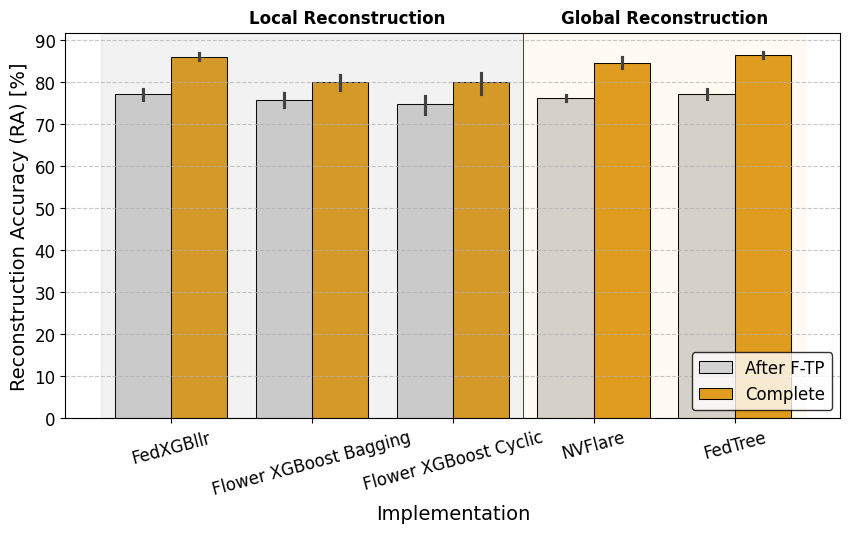

Average improvement in RA from Baseline to Accuracy: 7.19%


In [ ]:
# Transform DataFrame for Seaborn
stroke_no_top_df_melted = stroke_no_top_df.melt(id_vars=["System"], 
                                          value_vars=["Baseline Accuracy", "Accuracy"],
                                          var_name="Metric", value_name="RA")

# Create grouped bar plot
plt.figure(figsize=(10, 5))

sns.barplot(x='System', y='RA', hue='Metric', data=stroke_no_top_df_melted,
            palette={"Baseline Accuracy": "lightgrey", "Accuracy": "orange"},  # Custom colors
            edgecolor="black", linewidth=.75, order=[ 'FedXGBllr', 'Flower XGBoost Bagging', 'Flower XGBoost Cyclic', 'NVFlare', 'FedTree'])  # Adds bar edges for contrast

# Labels and title with custom styling
plt.xlabel("Implementation", fontsize=14)
plt.ylabel("Reconstruction Accuracy (RA) [%]", fontsize=14)

# Add shaded areas for zones
plt.axvspan(-0.5, 2.5, color='gray', alpha=0.1)  # Local Reconstruction
plt.axvspan(2.5, 4.5, color='orange', alpha=0.05)  # Global Reconstruction

# Add text labels for zones
plt.text(1.25, 93, 'Local Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(3.5, 93, 'Global Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a bold vertical separator line between local and global
plt.axvline(x=2.5, color='black', linestyle='-', linewidth=.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12, ticks=[i for i in range(0, 100, 10)])

# Modify legend labels
legend_labels = {"Baseline Accuracy": "After F-TP", "Accuracy": "Complete"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels]  # Map to new names
plt.legend(handles, new_labels, title_fontsize=13, fontsize=12, loc="lower right", frameon=True, edgecolor="black")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("stroke/pdf/stroke_phases_barplot.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

# Print the average improvement in RA from Baseline to Accuracy
baseline_avg = stroke_no_top_df["Baseline Accuracy"].mean()
accuracy_avg = stroke_no_top_df["Accuracy"].mean()
improvement = accuracy_avg - baseline_avg
print(f"Average improvement in RA from Baseline to Accuracy: {improvement:.2f}%")


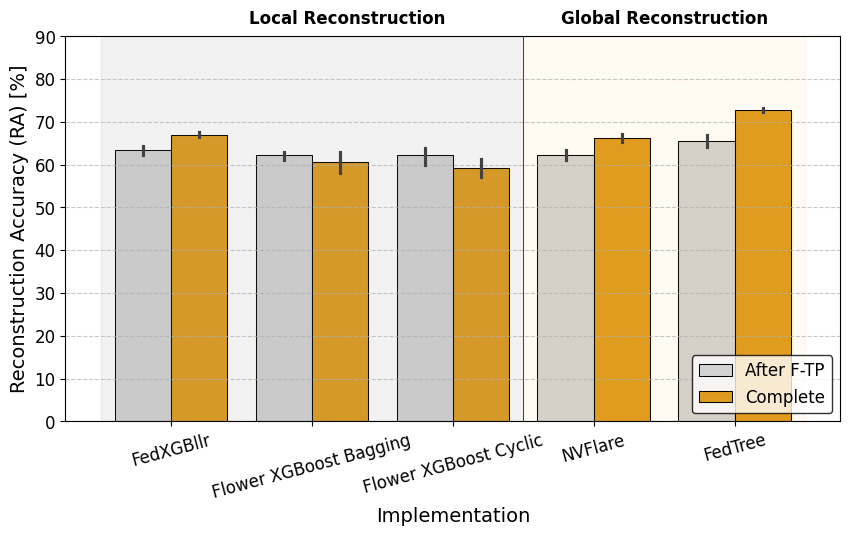

Average improvement in RA from Baseline to Accuracy: 1.97%


In [ ]:
# Transform DataFrame for Seaborn
diabetes_no_top_df_melted = diabetes_no_top_df.melt(id_vars=["System"], 
                                          value_vars=["Baseline Accuracy", "Accuracy"],
                                          var_name="Metric", value_name="RA")

# Create grouped bar plot
plt.figure(figsize=(10, 5))

sns.barplot(x='System', y='RA', hue='Metric', data=diabetes_no_top_df_melted,
            palette={"Baseline Accuracy": "lightgrey", "Accuracy": "orange"},  # Custom colors
            edgecolor="black", linewidth=.75, order=[ 'FedXGBllr', 'Flower XGBoost Bagging', 'Flower XGBoost Cyclic', 'NVFlare', 'FedTree'])  # Adds bar edges for contrast

# Labels and title with custom styling
plt.xlabel("Implementation", fontsize=14)
plt.ylabel("Reconstruction Accuracy (RA) [%]", fontsize=14)

# Add shaded areas for zones
plt.axvspan(-0.5, 2.5, color='gray', alpha=0.1)  # Local Reconstruction
plt.axvspan(2.5, 4.5, color='orange', alpha=0.05)  # Global Reconstruction

# Add text labels for zones
plt.text(1.25, 92, 'Local Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.text(3.5, 92, 'Global Reconstruction', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a bold vertical separator line between local and global
plt.axvline(x=2.5, color='black', linestyle='-', linewidth=.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12, ticks=[i for i in range(0, 100, 10)])

# Modify legend labels
legend_labels = {"Baseline Accuracy": "After F-TP", "Accuracy": "Complete"}
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels]  # Map to new names
plt.legend(handles, new_labels, title_fontsize=13, fontsize=12, loc="lower right", frameon=True, edgecolor="black")
# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("diabetes/pdf/diabetes_phases_barplot.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

# Print the average improvement in RA from Baseline to Accuracy
baseline_avg = diabetes_no_top_df["Baseline Accuracy"].mean()
accuracy_avg = diabetes_no_top_df["Accuracy"].mean()
improvement = accuracy_avg - baseline_avg
print(f"Average improvement in RA from Baseline to Accuracy: {improvement:.2f}%")

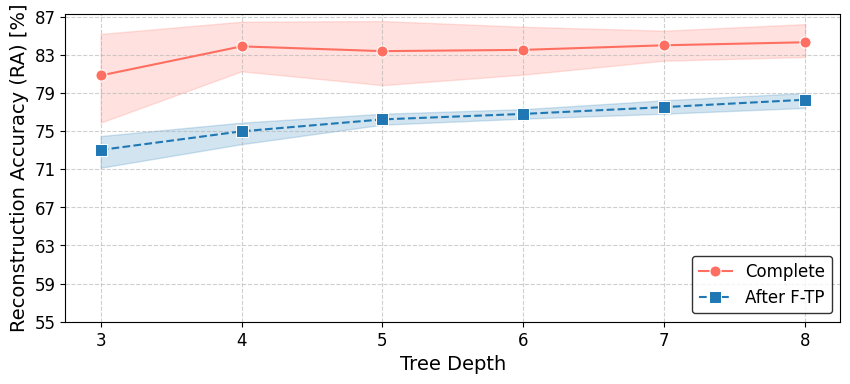

In [ ]:
# Define a more visually appealing color palette (Try "tab10", "Set2", etc.)
custom_palette = sns.color_palette("tab10")  # Change to your preferred palette


# Create the plot
plt.figure(figsize=(10, 4))
sns.lineplot(x="Depth", y="Accuracy", data=stroke_no_top_df, 
             marker="o", markersize=8, linewidth=1.5, color="#FF6F61", label="Complete")

sns.lineplot(x="Depth", y="Baseline Accuracy", data=stroke_no_top_df,
                marker="s", markersize=8, linewidth=1.5, color="#1F78B4", linestyle="--", label="After F-TP")

# Labels and title with custom styling
plt.xlabel("Tree Depth", fontsize=14)
plt.ylabel("Reconstruction Accuracy (RA) [%]", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, ticks=[i for i in range(55, 90, 4)])

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.legend(title_fontsize=13, fontsize=12, loc="lower right", frameon=True, edgecolor="black")

plt.savefig("stroke/pdf/stroke_depth_lineplot.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

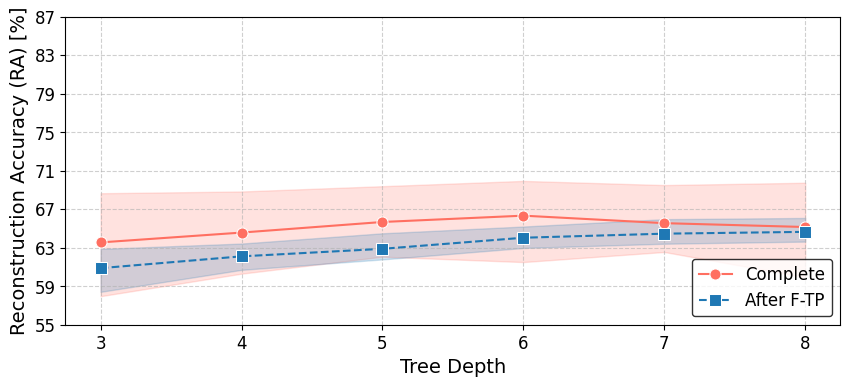

In [ ]:

# Define a more visually appealing color palette (Try "tab10", "Set2", etc.)
custom_palette = sns.color_palette("tab10")  # Change to your preferred palette


# Create the plot
plt.figure(figsize=(10, 4))
sns.lineplot(x="Depth", y="Accuracy", data=diabetes_no_top_df, 
             marker="o", markersize=8, linewidth=1.5, color="#FF6F61", label = "Complete")

sns.lineplot(x="Depth", y="Baseline Accuracy", data=diabetes_no_top_df,
                marker="s", markersize=8, linewidth=1.5, color="#1F78B4", linestyle="--", label="After F-TP")

# Labels and title with custom styling
plt.xlabel("Tree Depth", fontsize=14)
plt.ylabel("Reconstruction Accuracy (RA) [%]", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, ticks=[i for i in range(55, 90, 4)])

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.legend(title_fontsize=13, fontsize=12, loc="lower right", frameon=True, edgecolor="black")

plt.savefig("diabetes/pdf/diabetes_depth_lineplot.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

In [18]:
# Plot from the dp_no_top_df dataset the trend of Reconstruction Accuracy (RA) over the Utility which is the F1-score

# Aggregate for depth and privacy budget
dp_no_top_agg = dp_no_top_df.groupby("privacy_budget").mean().reset_index()
dp_no_top_std = dp_no_top_df.groupby("privacy_budget").std().reset_index()

# drop the depth column
dp_no_top_agg.drop("Depth", axis=1, inplace=True)
dp_no_top_std.drop("Depth", axis=1, inplace=True)

# Same for top

dp_top_agg = dp_top_df.groupby("privacy_budget").mean().reset_index()
dp_top_std = dp_top_df.groupby("privacy_budget").std().reset_index()

# drop the depth column
dp_top_agg.drop("Depth", axis=1, inplace=True)
dp_top_std.drop("Depth", axis=1, inplace=True)

print(dp_no_top_agg)
print(dp_no_top_std)

print(dp_top_agg)
print(dp_top_std)



  privacy_budget  RA (F-TP)         RA        F1       AUC
0            200  60.648333  70.515000  0.536167  0.781167
1             25  60.261667  54.425000  0.447667  0.604667
2             50  59.966667  61.590000  0.480667  0.649667
3     No Defense  65.540000  72.776667  0.601000  0.810000
  privacy_budget  RA (F-TP)        RA        F1       AUC
0            200   3.964580  1.771290  0.036052  0.032987
1             25   1.909465  4.634345  0.042065  0.054833
2             50   4.098652  3.224847  0.042991  0.037141
3     No Defense   1.950436  0.601121  0.008649  0.009654
  privacy_budget  RA (F-TP)         RA        F1       AUC
0            200  75.948333  85.840000  0.536167  0.781167
1             25  74.176667  67.646667  0.447667  0.604667
2             50  73.260000  75.696667  0.480667  0.649667
3     No Defense  82.645000  87.586667  0.601000  0.810000
  privacy_budget  RA (F-TP)        RA        F1       AUC
0            200   3.876088  1.169530  0.036052  0.032987
1   

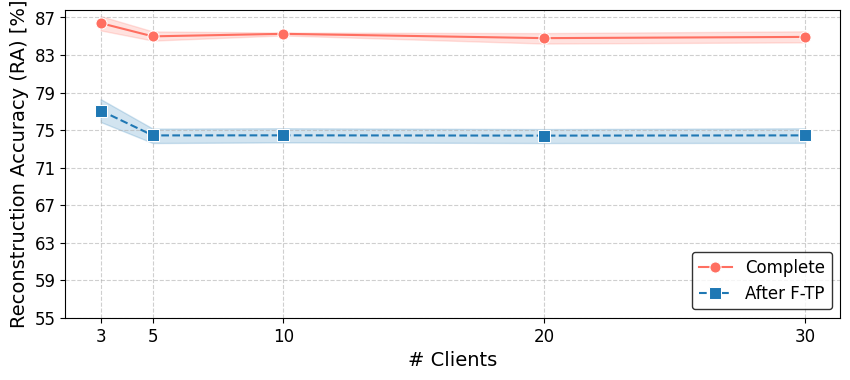

In [ ]:
# Define a more visually appealing color palette (Try "tab10", "Set2", etc.)
custom_palette = sns.color_palette("tab10")  # Change to your preferred palette


# Create the plot
plt.figure(figsize=(10, 4))
sns.lineplot(x="Num Clients", y="RA", data=scalability_df, 
             marker="o", markersize=8, linewidth=1.5, color="#FF6F61", label="Complete")

sns.lineplot(x="Num Clients", y="RA (F-TP)", data=scalability_df,
                marker="s", markersize=8, linewidth=1.5, color="#1F78B4", linestyle="--", label="After F-TP")

# Labels and title with custom styling
plt.xlabel("# Clients", fontsize=14)
plt.ylabel("Reconstruction Accuracy (RA) [%]", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12, ticks=[i for i in [3, 5, 10, 20, 30]])
plt.yticks(fontsize=12, ticks=[i for i in range(55, 90, 4)])

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.legend(title_fontsize=13, fontsize=12, loc="lower right", frameon=True, edgecolor="black")

plt.savefig("stroke/pdf/scalability.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()

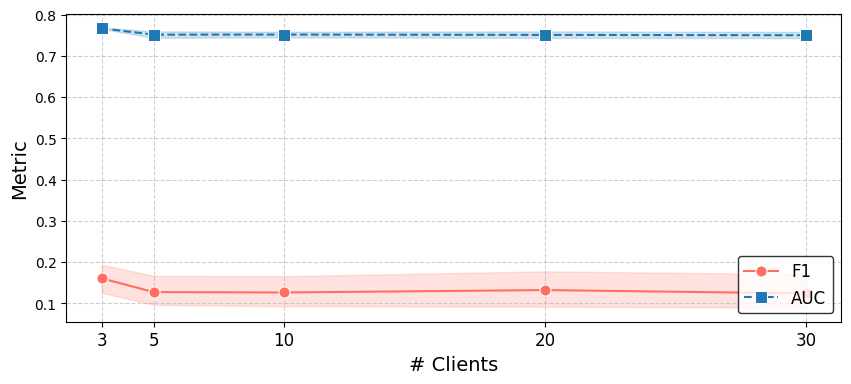

In [20]:
# Define a more visually appealing color palette (Try "tab10", "Set2", etc.)
custom_palette = sns.color_palette("tab10")  # Change to your preferred palette


# Create the plot
plt.figure(figsize=(10, 4))
sns.lineplot(x="Num Clients", y="F1", data=scalability_df, 
             marker="o", markersize=8, linewidth=1.5, color="#FF6F61", label="F1")

sns.lineplot(x="Num Clients", y="AUC", data=scalability_df,
                marker="s", markersize=8, linewidth=1.5, color="#1F78B4", linestyle="--", label="AUC")

# Labels and title with custom styling
plt.xlabel("# Clients", fontsize=14)
plt.ylabel("Metric", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12, ticks=[i for i in [3, 5, 10, 20, 30]])


# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.legend(title_fontsize=13, fontsize=12, loc="lower right", frameon=True, edgecolor="black")

#plt.savefig("scalability.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()